<a href="https://colab.research.google.com/github/hasib6750/Auto-Correction-system-/blob/main/auto_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import string
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_text(filename):
  with open(filename,'r') as file:
    lines=file.readlines()
    words=[]
    for line in lines:
      words+=re.findall(r'\w+',line.lower())
  return words
def tester(filename):
      test = open(filename, 'r')
      Lines = test.readlines()
      corrected=[]
      incorrect=[]
      for i in range(0,len(Lines)):
        line=Lines[i].split(':')
        corrected.append(line[0])
        corrected[i]=corrected[i].lower()
        incorrect.append(line[1])
        incorrect[i]=incorrect[i].lower()
        incorrect[i]=incorrect[i].strip()
      for i in range(0,len(incorrect)):
        word = incorrect[i]
        corrections = accuracy_tester(word, unique, word_provablity)
        if corrections:
          probs = np.array([c[1] for c in corrections])
          best_ix = np.argmax(probs)
          correct = corrections[best_ix][0]
          incorrect[i]=correct
      x=0
      for i in range(0,len(incorrect)):
        if (corrected[i]==incorrect[i]):
          x=x+1
      accuracy=x/len(incorrect)
      accuracy=accuracy*100
      print(accuracy)
def split(word):
  return [(word[:count], word[count:]) for count in range(len(word) + 1)]
def delete(word):
  return [left + right[1:] for left,right in split(word) if right]
def swap(word):
  return [left + right[1] + right[0] + right[2:] for left, right in split(word) if len(right)>1]
def replace(word):
  let_ascii = string.ascii_lowercase
  return [left + center + right[1:] for left, right in split(word) if right for c in let_ascii]
def insert(word):
  let_ascii = string.ascii_lowercase
  return [l + c + r for l, r in split(word) for c in let_ascii]
def replace(word):
  let_ascii = string.ascii_lowercase
  return [left + center + right[1:] for left, right in split(word) if right for center in let_ascii]
def insert(word):
  let_ascii = string.ascii_lowercase
  return [left + center + right for left, right in split(word) for center in let_ascii]
def edit_lvl_1(word):
  return set(delete(word) + swap(word) + replace(word) + insert(word))
def edit_lvl_2(word):
  return set(edit2 for edit1 in edit_lvl_1(word) for edit2 in edit_lvl_1(edit1))
def accuracy_tester(word, unique, word_probabilities):
  if word in unique:
   # print(f"{word} is correctly spelt")
    return

  suggestions = edit_lvl_1(word) or edit_lvl_2(word) or [word]
  close = [word for word in suggestions if word in unique]
  return [(word, word_probabilities[word]) for word in close]
def word_correction(word, unique, word_probabilities):
  if word in unique:
    print(f"{word} is correctly spelt")
    return

  suggestions = edit_lvl_1(word) or edit_lvl_2(word) or [word]
  close = [word for word in suggestions if word in unique]
  return [(word, word_probabilities[word]) for word in close]

In [ ]:
w=read_text("big.txt")
print(f"there are {len(w)} words in the dataset")


there are 1115585 words in the dataset


In [ ]:
unique=set(w)
print(f"there are {len(unique)} unique words ")


there are 32198 unique words 


In [ ]:
words_counter=Counter(w)
print(words_counter["that"])


12512


In [ ]:
total_w_c= float(sum(words_counter.values()))
word_provablity={word:words_counter[word] / total_w_c for word in words_counter.keys()}


In [ ]:
t1=tester("wikipedia.txt")
t2=tester("aspell.txt")
t3=tester("spell-testset1.txt")
t4=tester("spell-testset2.txt")


43.02809573361082
30.666666666666664
36.17021276595745
53.994490358126725


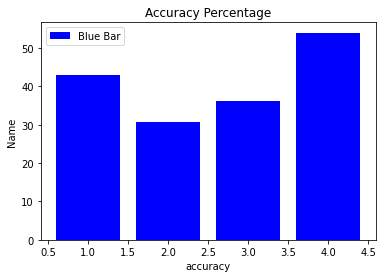

In [ ]:
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1,2,3,4]
y1 = [43.03,30.66,36.17,53.99]



# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')

plt.plot()

plt.xlabel("accuracy")
plt.ylabel("Name")
plt.title("Accuracy Percentage")
plt.legend()
plt.show()

In [ ]:
word = input()
corrections = word_correction(word, unique, word_provablity)

if corrections:
  print(corrections)
  probs = np.array([c[1] for c in corrections])
  best_word = np.argmax(probs)
  correct = corrections[best_word][0]
  print(f"{correct} is suggested for {word}")



pouy
[('pony', 3.585562731660967e-06), ('poky', 8.963906829152417e-07), ('poly', 2.6891720487457255e-06), ('pour', 1.7927813658304835e-05)]
pour is suggested for pouy
